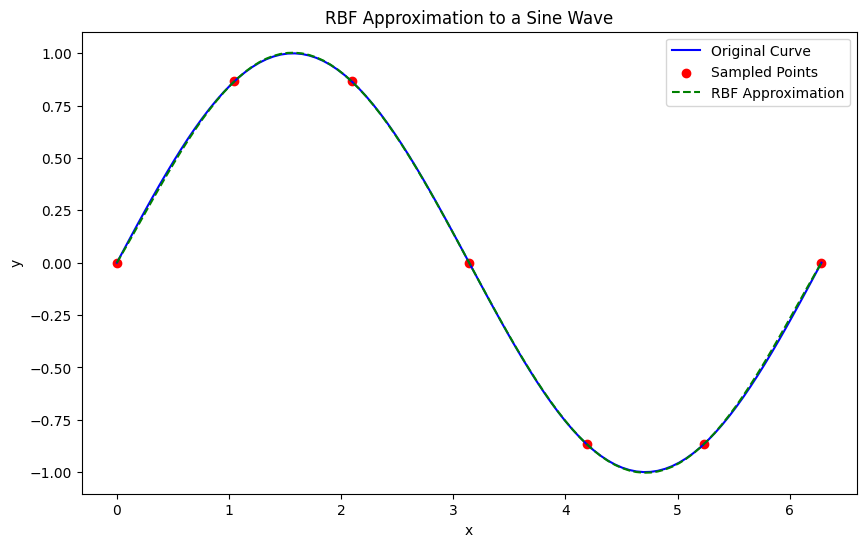

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator

# Define a target curve, for example, a sine wave
def target_curve(x):
    return np.sin(x)

# Sample points from the curve
x_sampled = np.linspace(0, 2*np.pi, 7)  # 10 sample points
y_sampled = target_curve(x_sampled)

# Apply RBF interpolation
rbf_interpolator = RBFInterpolator(x_sampled[:, np.newaxis], y_sampled, kernel="gaussian", epsilon=0.1)

# Generate points for approximation and evaluate
x_fine = np.linspace(0, 2*np.pi, 100)  # Fine sampling for evaluation
y_rbf_approx = rbf_interpolator(x_fine[:, np.newaxis])

# Original curve
y_original = target_curve(x_fine)

# Plot the original curve, sampled points, and RBF approximation
plt.figure(figsize=(10, 6))
plt.plot(x_fine, y_original, label='Original Curve', color='blue')
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points')
plt.plot(x_fine, y_rbf_approx, label='RBF Approximation', color='green', linestyle='--')
plt.legend()
plt.title('RBF Approximation to a Sine Wave')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




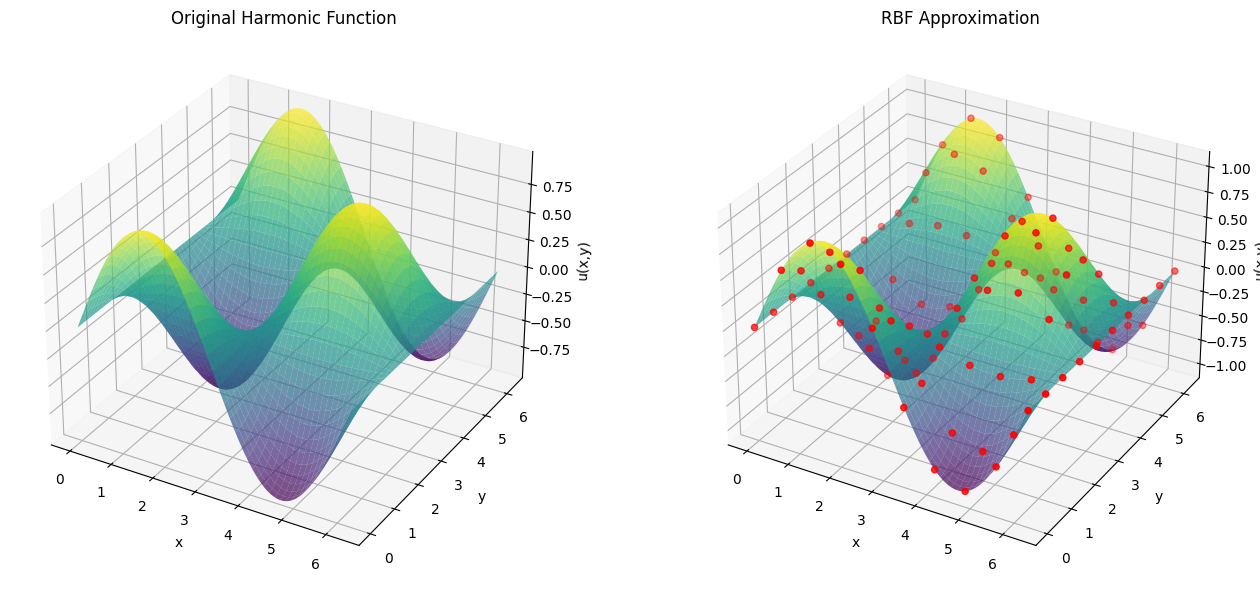

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate a random Gaussian field
def harmonic_function(x, y):
    return np.sin(x) * np.cos(y)




# Sample points from the function
x_sampled = np.linspace(0, 2*np.pi, 10)  # More points for higher dimensionality
y_sampled = np.linspace(0, 2*np.pi, 10)
x_sampled_grid, y_sampled_grid = np.meshgrid(x_sampled, y_sampled)
z_sampled = harmonic_function(x_sampled_grid, y_sampled_grid)

# Flatten the grids for RBF interpolation
x_sampled_flat = x_sampled_grid.flatten()
y_sampled_flat = y_sampled_grid.flatten()
z_sampled_flat = z_sampled.flatten()

# Apply RBF interpolation
xy_sampled_flat = np.vstack((x_sampled_flat, y_sampled_flat)).T  # Combine x and y coordinates
rbf_interpolator = RBFInterpolator(xy_sampled_flat, z_sampled_flat, kernel="gaussian", epsilon=0.3)

# Generate points for approximation and evaluate
x_fine = np.linspace(0, 2*np.pi, 100)
y_fine = np.linspace(0, 2*np.pi, 100)
x_fine_grid, y_fine_grid = np.meshgrid(x_fine, y_fine)
xy_fine_flat = np.vstack((x_fine_grid.flatten(), y_fine_grid.flatten())).T

z_rbf_approx_flat = rbf_interpolator(xy_fine_flat)
z_rbf_approx = z_rbf_approx_flat.reshape(100, 100)

# Original harmonic function evaluation
z_original = harmonic_function(x_fine_grid, y_fine_grid)

# Plotting
fig = plt.figure(figsize=(14, 6))

# Original function
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_fine_grid, y_fine_grid, z_original, cmap='viridis', alpha=0.7)
ax1.set_title('Original Harmonic Function')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('u(x,y)')

# RBF Approximation
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_fine_grid, y_fine_grid, z_rbf_approx, cmap='viridis', alpha=0.7)
ax2.scatter(x_sampled_flat, y_sampled_flat, z_sampled_flat, color='r')  # Sampled points
ax2.set_title('RBF Approximation')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('u(x,y)')

plt.tight_layout()
plt.show()

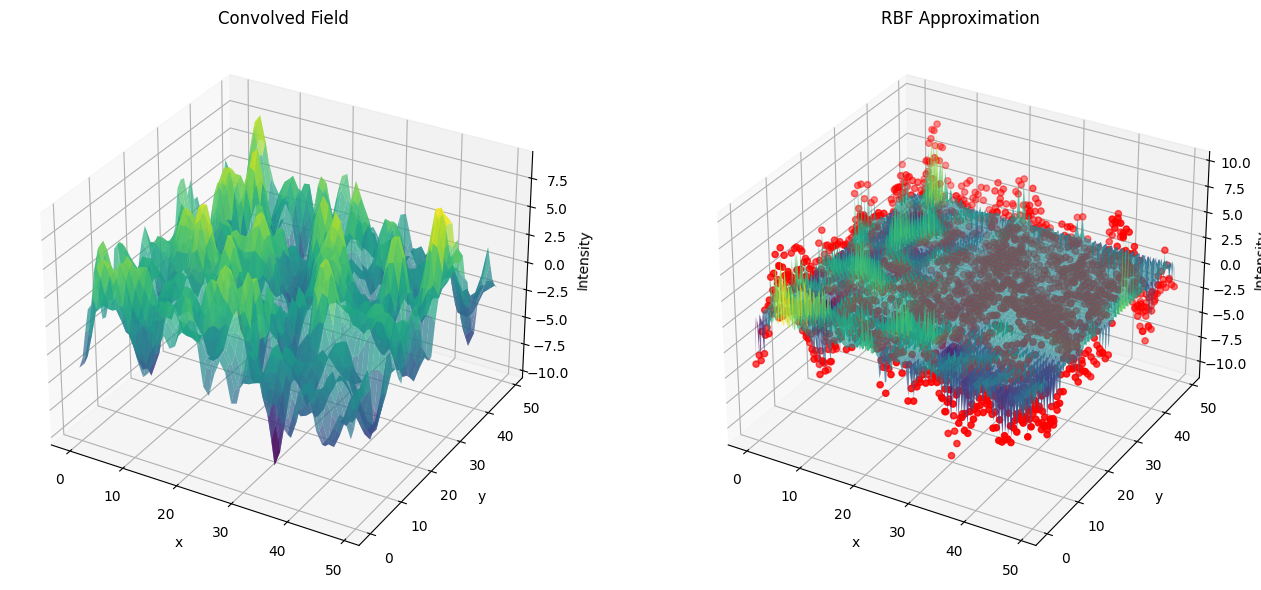

2.395125764387274e-16

In [43]:
from scipy.stats import norm
from scipy.signal import convolve2d

# Generate a random Gaussian field
np.random.seed(42)  # For reproducibility
grid_size = 50
random_gaussian_field = norm.rvs(size=(grid_size, grid_size))

# Define an irregular convolution kernel
kernel_size = 5
x = np.arange(0, kernel_size) - kernel_size // 2
y = np.arange(0, kernel_size) - kernel_size // 2
xx, yy = np.meshgrid(x, y)
irregular_kernel = np.exp(-(xx**2 + yy**2) / 10.0) * np.cos(xx * 0.5)

# Perform Convolution
convolved_field = convolve2d(random_gaussian_field, irregular_kernel, mode='same', boundary='wrap')

# Prepare for RBF interpolation
# Since the field is already on a grid, we'll use the indices as x, y coordinates for sampling
x_sampled, y_sampled = np.meshgrid(np.arange(grid_size), np.arange(grid_size))

z_sampled = convolved_field  # The convolved field serves as our 'z' values

# Flatten the coordinates and values for RBF interpolation
x_sampled_flat = x_sampled.flatten()
y_sampled_flat = y_sampled.flatten()
z_sampled_flat = z_sampled.flatten()
xy_sampled_flat = np.vstack((x_sampled_flat, y_sampled_flat)).T

# Apply RBF interpolation
rbf_interpolator = RBFInterpolator(xy_sampled_flat, z_sampled_flat, kernel="gaussian", epsilon=5)

# Generate points for approximation and evaluate on a finer grid
x_fine = np.linspace(0, grid_size-1, 200)
y_fine = np.linspace(0, grid_size-1, 200)
x_fine_grid, y_fine_grid = np.meshgrid(x_fine, y_fine)
xy_fine_flat = np.vstack((x_fine_grid.flatten(), y_fine_grid.flatten())).T

z_rbf_approx_flat = rbf_interpolator(xy_fine_flat)
z_rbf_approx = z_rbf_approx_flat.reshape(200, 200)

# Plotting
fig = plt.figure(figsize=(14, 6))

# Convolved field
ax1 = fig.add_subplot(121, projection='3d')
x_mesh, y_mesh = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
ax1.plot_surface(x_mesh, y_mesh, convolved_field, cmap='viridis', alpha=0.7)
ax1.set_title('Convolved Field')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Intensity')

# RBF Approximation
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_fine_grid, y_fine_grid, z_rbf_approx, cmap='viridis', alpha=0.7)
ax2.scatter(x_sampled_flat, y_sampled_flat, z_sampled_flat, color='r')  # Sampled points
ax2.set_title('RBF Approximation')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Intensity')

plt.tight_layout()
plt.show()
# Calculate the difference between the original (convolved field) and RBF approximation
# We need to evaluate the RBF approximation at the original grid points for a direct comparison
xy_original_grid_flat = np.vstack((x_mesh.flatten(), y_mesh.flatten())).T
z_rbf_approx_at_original_points_flat = rbf_interpolator(xy_original_grid_flat)
z_rbf_approx_at_original_points = z_rbf_approx_at_original_points_flat.reshape(grid_size, grid_size)

# Calculate the difference
difference = convolved_field - z_rbf_approx_at_original_points

# Calculate a summary statistic for the difference - Mean Absolute Error (MAE)
mae = np.mean(np.abs(difference))
mae

2.508292027541966
2.212600091130687
2.168087617225392
2.1113626137044585
2.0475223937888734
1.9912821391798728e-16
1.8275487857050925
1.6510006500172232
1.4684785947396997
1.2744294408184667
1.061031736958713
0.8516927057851724
0.6534544472976492
0.46844438195463484


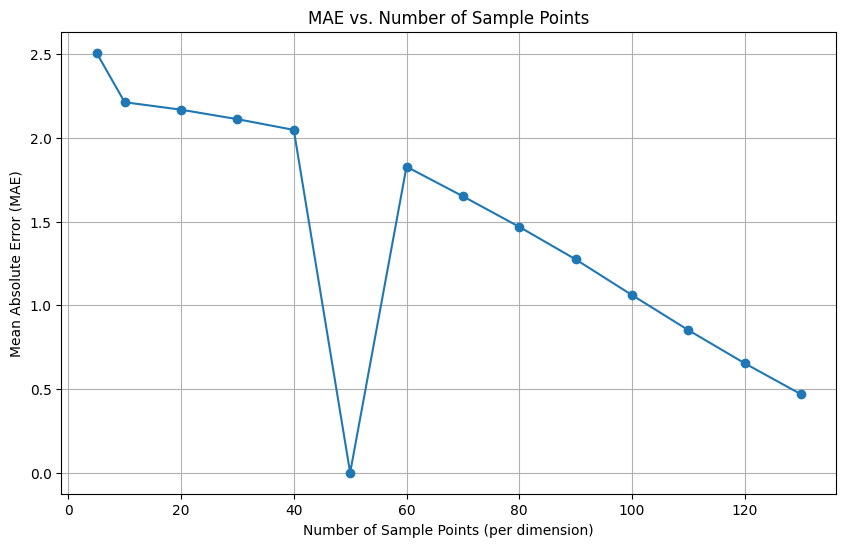

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.signal import convolve2d
from scipy.interpolate import RBFInterpolator

# Function to generate a convolved field
def generate_convolved_field(grid_size, kernel_size):
    np.random.seed(42)
    random_gaussian_field = norm.rvs(size=(grid_size, grid_size))
    x = np.arange(0, kernel_size) - kernel_size // 2
    y = np.arange(0, kernel_size) - kernel_size // 2
    xx, yy = np.meshgrid(x, y)
    irregular_kernel = np.exp(-(xx**2 + yy**2) / 10.0) * np.cos(xx * 0.5)
    convolved_field = convolve2d(random_gaussian_field, irregular_kernel, mode='same', boundary='wrap')
    return convolved_field

# Function to perform RBF interpolation and calculate MAE
def calculate_mae_with_sample_points(grid_size, num_sample_points):
    convolved_field = generate_convolved_field(grid_size, kernel_size=5)
    x_sampled, y_sampled = np.meshgrid(np.linspace(0, grid_size-1, num_sample_points),
                                       np.linspace(0, grid_size-1, num_sample_points))
    z_sampled = convolved_field[np.round(x_sampled).astype(int), np.round(y_sampled).astype(int)]
    x_sampled_flat = x_sampled.flatten()
    y_sampled_flat = y_sampled.flatten()
    z_sampled_flat = z_sampled.flatten()
    xy_sampled_flat = np.vstack((x_sampled_flat, y_sampled_flat)).T
    rbf_interpolator = RBFInterpolator(xy_sampled_flat, z_sampled_flat, kernel="gaussian", epsilon=5)
    xy_original_grid_flat = np.vstack((np.arange(grid_size).repeat(grid_size),
                                       np.tile(np.arange(grid_size), grid_size))).T
    z_rbf_approx_at_original_points_flat = rbf_interpolator(xy_original_grid_flat)
    z_rbf_approx_at_original_points = z_rbf_approx_at_original_points_flat.reshape(grid_size, grid_size)
    difference = convolved_field - z_rbf_approx_at_original_points
    mae = np.mean(np.abs(difference))
    return mae

# Test with different numbers of sampled points
grid_size = 50
sample_points_list = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
mae_results = []

for num_sample_points in sample_points_list:
    mae = calculate_mae_with_sample_points(grid_size, num_sample_points)
    print(mae)
    mae_results.append(mae)

# Plot the MAE as a function of the number of sampled points
plt.figure(figsize=(10, 6))
plt.plot(sample_points_list, mae_results, marker='o')
plt.xlabel('Number of Sample Points (per dimension)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Sample Points')
plt.grid(True)
plt.show()
